Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una célula mamaria.

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe todas las librerías a utilizar.
  
- Fije los parámetros de los gráficos con `plt.Rcparams`.
  
- Excluya las columnas `id` y `Unnamed: 32` de la base de datos.
  
- Recodifique el vector objetivo `diagnosis` a numérico para poder procesarlo posteriormente.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lec5_graphs as afx
plt.style.use( 'seaborn-whitegrid' )
plt.rcParams[ 'figure.figsize' ]=( 8, 6 )

C:\Users\carol\AppData\Local\Temp\ipykernel_19632\171279716.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use( 'seaborn-whitegrid' )


In [50]:
df = pd.read_csv('breast_cancer.csv').drop(columns = ['Unnamed: 32','id'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
df['diagnosis'] = df['diagnosis'].replace(to_replace=['M','B'], value=[1,0])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Visualizando la distribución de los atributos
- Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
- Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

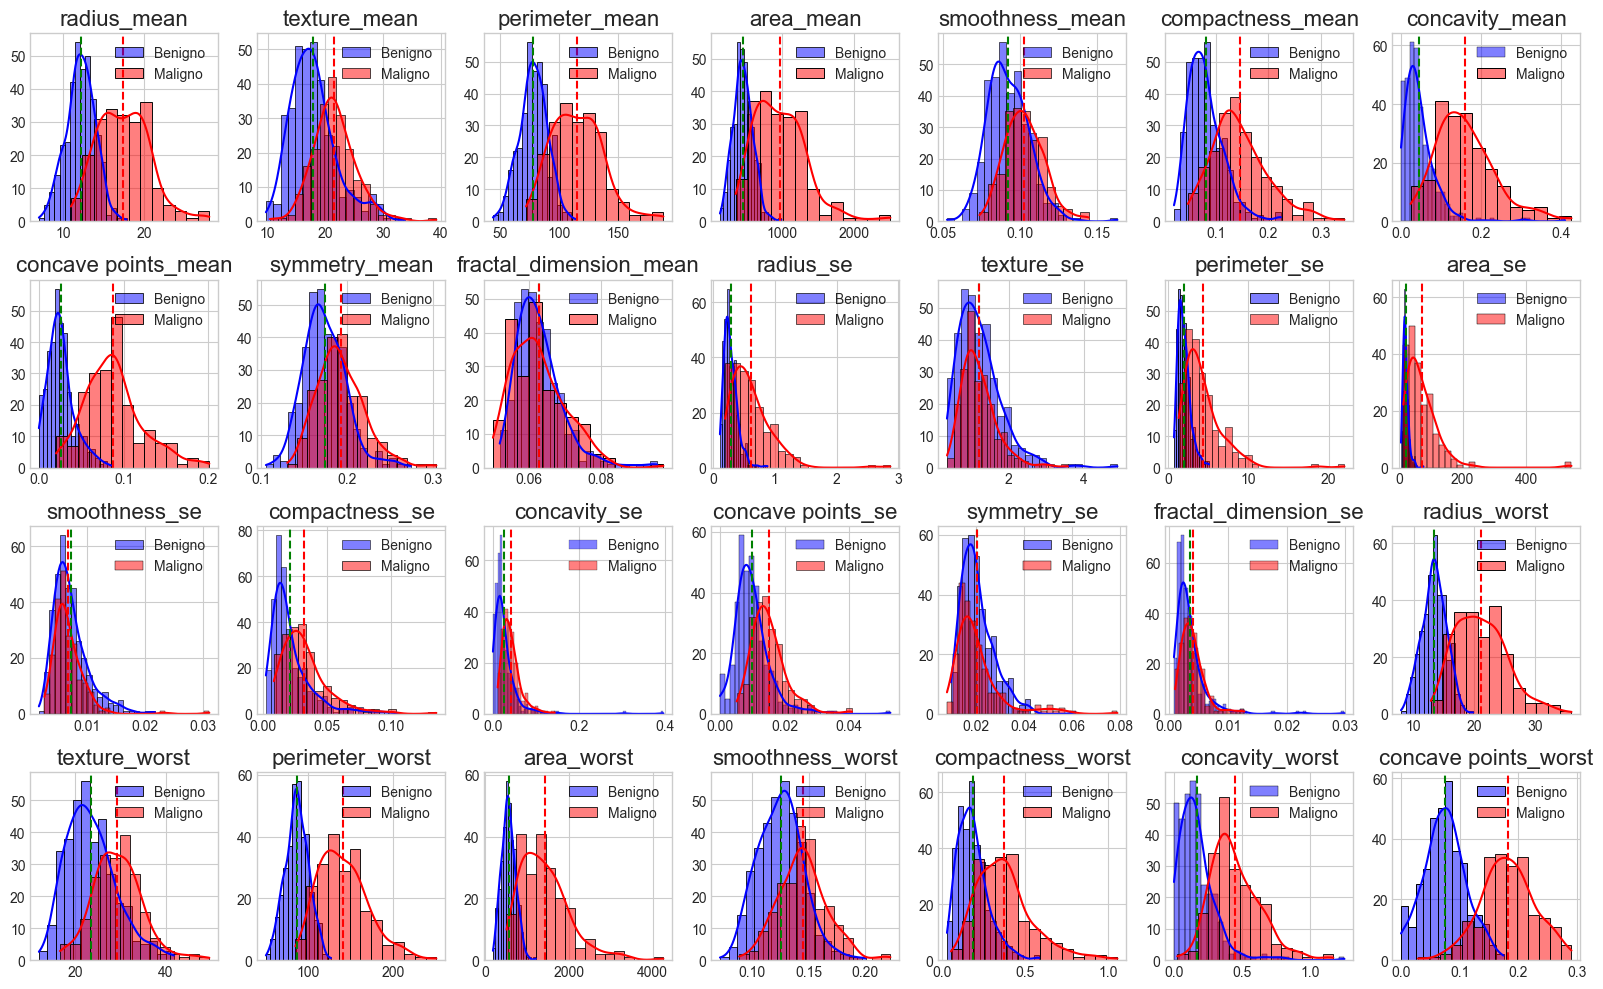

In [52]:
#separacion de los datos por clase del vector objetivo
maligno = df[df['diagnosis'] == 1]
benigno = df[df['diagnosis'] == 0]

#lista de atributos
features = df.columns[1:]
rows = 4
cols = int(df.shape[1] / rows)

fig, axes = plt.subplots(rows, cols, figsize=(16, 10))
axes = axes.flatten()

#para los histogramas
for i, (feature, ax) in enumerate(zip(features, axes)):
    sns.histplot(benigno[feature], label='Benigno', kde=True, color='blue', ax=ax)
    sns.histplot(maligno[feature], label='Maligno', kde=True, color='red', ax=ax)
    ax.axvline(benigno[feature].mean(), color='green', linestyle='dashed', linewidth=1.5)
    ax.axvline(maligno[feature].mean(), color='red', linestyle='dashed', linewidth=1.5)
    ax.set_title(f'Distribución de {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frecuencia')
    ax.legend()


    ax.set_title(feature, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('')


plt.tight_layout()
plt.show()


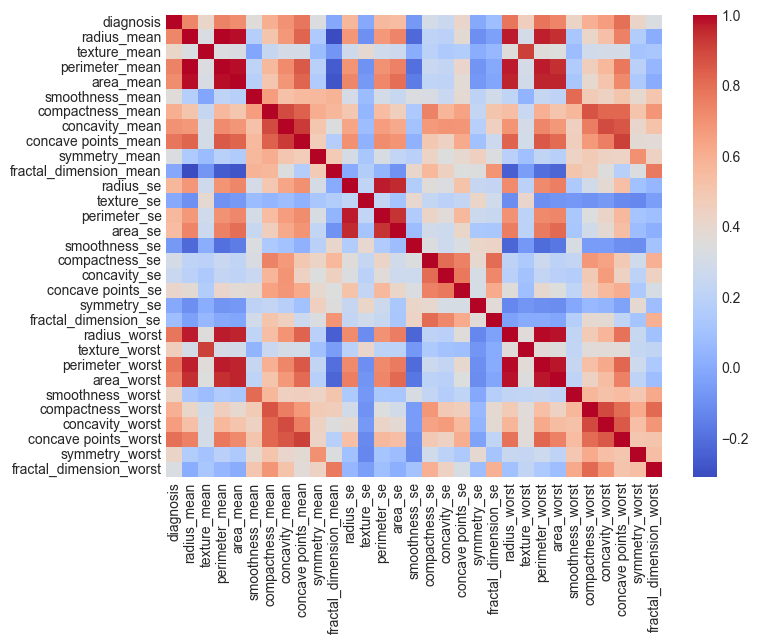

<Figure size 1600x1200 with 0 Axes>

In [53]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',annot_kws={"fontsize": 10})
plt.figure(figsize=(16, 12))
plt.tight_layout()
plt.show()


hay gran correlación entre: area y perimetro con el radio, y del radio con la textura. Tambien se ve un gran correlacion entre el fractal dimension y el smoothness, compactness y concavity.

Estimando el porcentaje de overlap en los atributos
- Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvia es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.

- El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:

```python
def histogram_overlap (df, attribute, target, perc= 100 ):
  # get lower bound
  empirical_lower_bound = np.floor(df[attribute].min())
  # get upper bound
  empirical_upper_bound = np.ceil(df[attribute].max())
  # preserve histograms
  tmp_hist_holder = dict()
  # for each target class
  for unique_value in np.unique(df[target]):
    # get histogram
    tmp, _ = np.histogram(
      # for a specific attribute
      df[df[target] == unique_value][attribute],
      # define percentage
      bins=perc,
      # limit empirical range for comparison
      range=[empirical_lower_bound, empirical_upper_bound]
    )
    # append to dict
    tmp_hist_holder[ "h_" +str(unique_value)] = tmp
  get_minima = np.minimum(tmp_hist_holder[ "h_1" ], tmp_hist_holder[ "h_0" ])
  intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder[ "h_0" ]))
  return intersection
```

- La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde
mayores niveles indican una mayor comunalidad.
- Utilizando la función, generará un data frame donde almacenará el nombre del atributo y
su porcentaje. Ordene este data frame de forma descendente y preserve.


In [54]:
import pandas as pd
import numpy as np

def histogram_overlap(df, attribute, target, perc=100):
    empirical_lower_bound = np.floor(df[attribute].min())
    empirical_upper_bound = np.ceil(df[attribute].max())
    tmp_hist_holder = dict()
    for unique_value in np.unique(df[target]):
        tmp, _ = np.histogram(
            df[df[target] == unique_value][attribute],
            bins=perc,
            range=[empirical_lower_bound, empirical_upper_bound]
        )
        tmp_hist_holder["h_" + str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder["h_0"]))
    return intersection

In [55]:
overlap_data = pd.DataFrame(columns=['Attribute', 'Overlap'])
#porcentaje de comunalidad para cada atributo
for attribute in df.columns[1:]:
    overlap_percentage = histogram_overlap(df, attribute, 'diagnosis')
    overlap_data = overlap_data.append({'Attribute': attribute, 'Overlap': overlap_percentage}, ignore_index=True)
overlap_data = overlap_data.sort_values(by='Overlap', ascending=False) #orden en forma descendiente
print(overlap_data)

                  Attribute   Overlap
19     fractal_dimension_se  0.593838
14            smoothness_se  0.591036
9    fractal_dimension_mean  0.588235
18              symmetry_se  0.568627
11               texture_se  0.549020
15           compactness_se  0.523810
4           smoothness_mean  0.521008
8             symmetry_mean  0.509804
17        concave points_se  0.507003
29  fractal_dimension_worst  0.492997
24         smoothness_worst  0.453782
16             concavity_se  0.450980
28           symmetry_worst  0.436975
1              texture_mean  0.389356
21            texture_worst  0.380952
5          compactness_mean  0.316527
25        compactness_worst  0.316527
12             perimeter_se  0.280112
10                radius_se  0.277311
26          concavity_worst  0.212885
13                  area_se  0.207283
0               radius_mean  0.184874
6            concavity_mean  0.182073
3                 area_mean  0.179272
2            perimeter_mean  0.168067
27     conca

C:\Users\carol\AppData\Local\Temp\ipykernel_19632\2560439916.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overlap_data = overlap_data.append({'Attribute': attribute, 'Overlap': overlap_percentage}, ignore_index=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_19632\2560439916.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overlap_data = overlap_data.append({'Attribute': attribute, 'Overlap': overlap_percentage}, ignore_index=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_19632\2560439916.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overlap_data = overlap_data.append({'Attribute': attribute, 'Overlap': overlap_percentage}, ignore_index=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_19632\2560439916.

Selección del modelo por GridSearchCV
- Entrene una serie de modelos SVC con los siguientes hiper parámetros:
  + `C: [ 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000 ]`.
  + `gamma: [ 0.0000001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 ]`.
  + Validaciones cruzadas: 10.
- Genere un heatmap en base a los puntajes estimados con `GridSearchCV`.

*Tip: Vea cómo acceder a la llave mean_test_score en el diccionario `cv_results_`.*

### Un par de elementos a considerar en la implementación de `GridSearchCV`.

Si trabajamos con `sklearn.model_selection.GridSearchCV`, tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos X_train y y_train a nuestro objeto instanciado y preservando X_test e y_test como una muestra de validación externa. Si tenemos un archivo de testing externo, se recomienda no hacer división.

- El objeto creado con `sklearn.model_selection.GridSearchCV` sigue la misma funcionalidad de cualquier método de estimación de `scikit-learn`, con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:
  + `sklearn.model_selection.GridSearchCV.cv_results_` devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo.
  + `split` : Indicará la métrica específica en cada validación cruzada y combinación de hiper parámetros.
  + `time` : Indicará el tiempo de ejecución en cada modelo.
  + Por lo general trabajaremos con mean_test_score y mean_train_score que
representa la media de CV para cada combinación de hiper parámetros.
  + `sklearn.model_selection.GridSearchCV.best_estimator_` devuelve un
modelo listo para entrenar con la mejor combinación de hiper parámetros.
  + `sklearn.model_selection.GridSearchCV.best_score_` devuelve el
desempeño promedio del modelo en el testing interno. Si es un problema de
clasificación devolverá `Accuracy`, si es un problema de regresión devolverá `MSE`.

- Reporte en qué rango de cada hiper parámetro el modelo presenta un desempeño eficiente. Reporte la mejor combinación de hiper parámetros y el desempeño en la muestra de entrenamiento.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.3, random_state=8874)


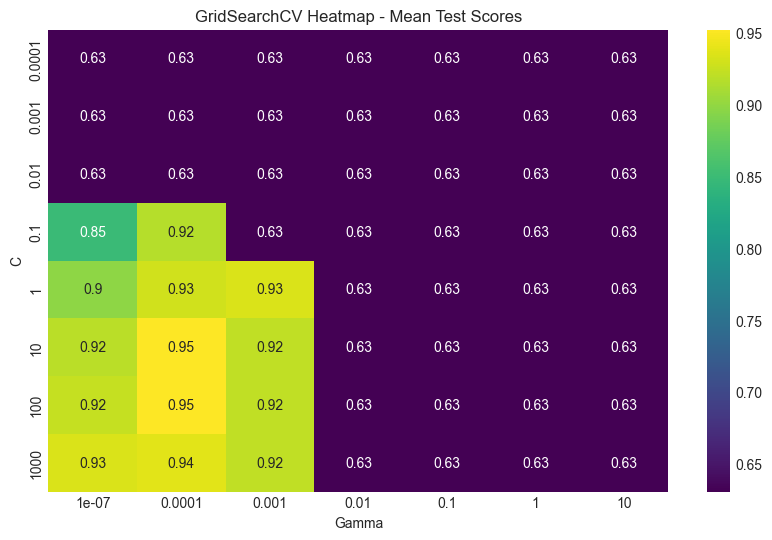

Mejor combinación de hiperparámetros:
{'C': 100, 'gamma': 0.0001}
Desempeño en la muestra de entrenamiento:
0.9523076923076923


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

#definicion de los valores de los hiperparámetros
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
}
#creación objeto GridSearchCV
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=10)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
scores = cv_results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('GridSearchCV Heatmap - Mean Test Scores')
plt.show()
#mejor combinación de hiperparámetros y su desempeño
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Mejor combinación de hiperparámetros:')
print(best_params)
print('Desempeño en la muestra de entrenamiento:')
print(best_score)


Validación del modelo en el hold-out sample

- Genere las predicciones del hold-out sample en base a la mejor combinación de hiper parámetros. Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. Comente en qué casos el modelo presenta un desempeño deficiente.

In [58]:
from sklearn.metrics import classification_report
#mejor modelo entrenado con la mejor combinación de hiperparámetros
best_model = grid_search.best_estimator_
#predicciones en el hold-out sample 
y_pred = best_model.predict(X_test)
#métricas
classification_metrics = classification_report(y_test, y_pred)

print("Reporte de Métricas de Desempeño:")
print(classification_metrics)


Reporte de Métricas de Desempeño:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       106
           1       0.92      0.83      0.87        65

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171

